# Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import csv
import awkward as ak
import vector
import math
from pandas import *
plt.rcParams['figure.dpi'] = 200 
import pandas as pd

# Inspect Data

In [12]:
file = uproot.open('/Users/vinayakkapoor/Downloads/top_masses.root')

In [13]:
event_selection_masses = file['event_selection_masses;1']['event_selection'].array()
no_event_selection_masses = file['no_event_selection_masses;1']['no_event_selection'].array()

In [14]:
len(no_event_selection_masses)

23556

# Mass Extraction (without event selection)

### Plotting the mass distribution for the generator level top quarks

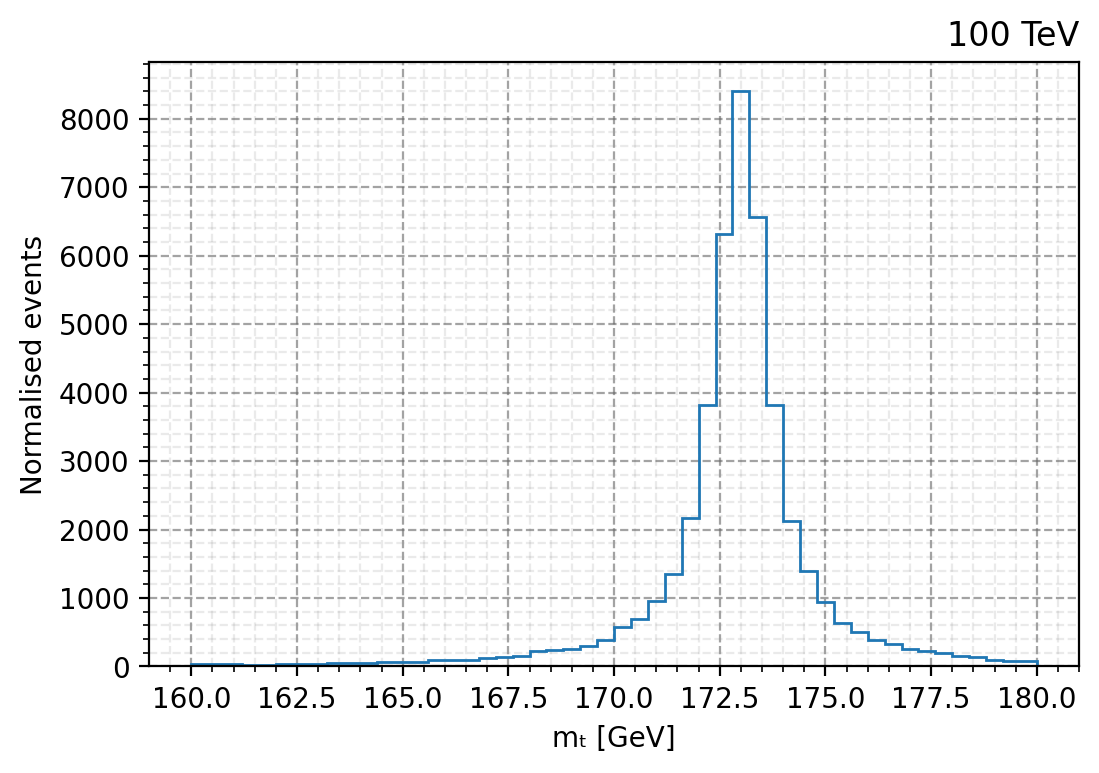

In [15]:
plt.hist(ak.ravel(no_event_selection_masses),bins=50, range=(160,180),histtype='step')
plt.xlabel(u'm\u209c [GeV]')
plt.ylabel('Normalised events')
plt.title('100 TeV',loc = 'right')
plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

plt.show()

### Fitting a relativistic Breit-Wigner

In [16]:
from scipy.optimize import curve_fit

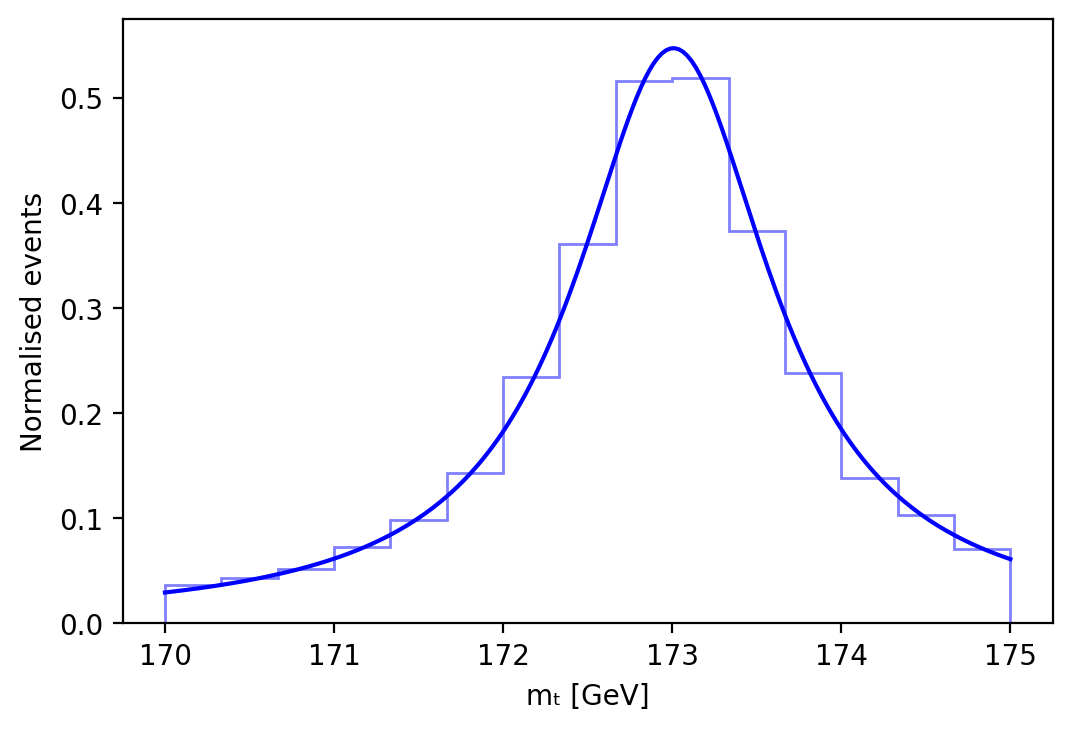

[173.00727985   1.42147709   1.2219811 ] [[4.49751636e-05 5.41103832e-06 2.70450941e-06]
 [5.41103832e-06 2.85089919e-04 5.15741046e-05]
 [2.70450941e-06 5.15741046e-05 8.70789336e-05]]


In [17]:
def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)
data = ak.ravel(no_event_selection_masses)
bin_contents, bin_edges = np.histogram(data.to_numpy(), bins=15, range=(170, 175),density= True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[200, 20, 30],
                       sigma=np.sqrt(bin_contents))

plt.hist(data, bins=15, range=(170, 175), label='Data',histtype='step',color='b',alpha=0.5,density= True)
x1 = np.linspace(170, 175, 200)
y1 = relativistic_breit_wigner(x1, *popt)
plt.plot(x1, y1, label='Fit', color='b')

plt.xlabel(u'm\u209c [GeV]')
plt.ylabel('Normalised events')
'''
plt.text(400, 3500, '$m\u209c = 252.48  GeV$', fontsize = 12)
plt.text(400, 3250, '$\sigma m\u209c =  86.00 GeV$', fontsize = 12)
plt.title('100 TeV',loc = 'right')
plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

'''
plt.show()
print(popt,pcov)

In [19]:
resonance_mass

NameError: name 'resonance_mass' is not defined

In [8]:
m1 = popt[0]
m1_err = pcov[0,0]**0.5
print("mt =", m1, "±", m1_err)

mt = 173.0072798502523 ± 0.006706352477739968


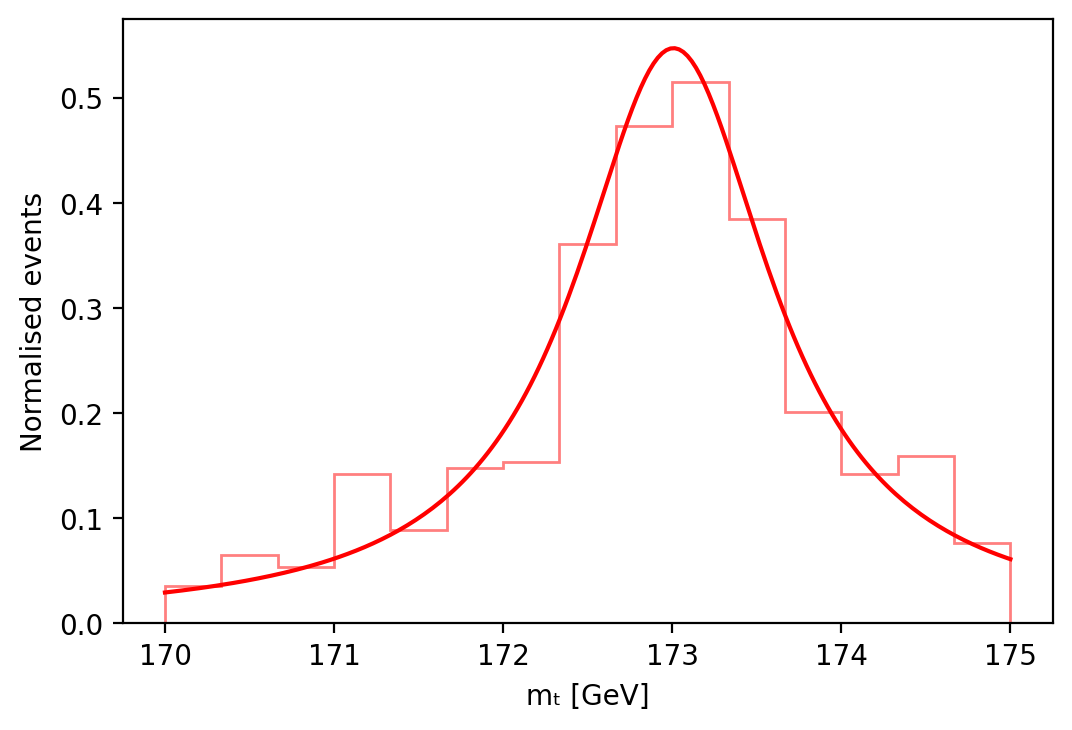

[173.04986162   1.50639864   1.19821318] [[0.00271034 0.0004513  0.00019868]
 [0.0004513  0.01958517 0.00350705]
 [0.00019868 0.00350705 0.00480571]]


In [9]:
def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)
data = ak.ravel(event_selection_masses)
bin_contents, bin_edges = np.histogram(data.to_numpy(), bins=15, range=(170, 175),density= True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[200, 20, 30],
                       sigma=np.sqrt(bin_contents))

plt.hist(data, bins=15, range=(170, 175), label='Data',histtype='step',color='r',alpha=0.5,density= True)
x2 = np.linspace(170, 175, 200)
y2 = relativistic_breit_wigner(x1, *popt)
plt.plot(x1, y1, label='Fit', color='r')

plt.xlabel(u'm\u209c [GeV]')
plt.ylabel('Normalised events')
'''
plt.text(400, 3500, '$m\u209c = 252.48  GeV$', fontsize = 12)
plt.text(400, 3250, '$\sigma m\u209c =  86.00 GeV$', fontsize = 12)
plt.title('100 TeV',loc = 'right')
plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

'''
plt.show()
print(popt,pcov)

In [114]:
m2 = popt[0]
m2_err = pcov[0,0]**0.5
print("mt =", m1, "±", m1_err)

mt = 173.0072798502523 ± 0.006706352477739968


# Mass Extraction (with event selection)

### Plotting the mass distribution for the top quarks that pass event selection

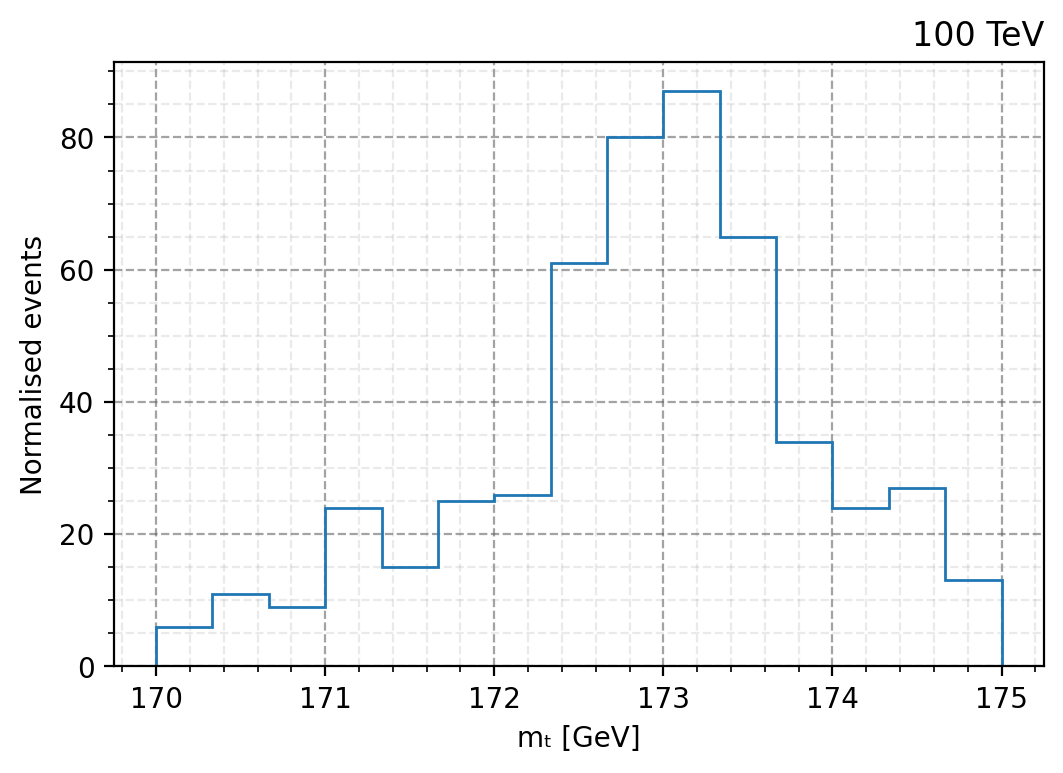

In [72]:
plt.hist(ak.ravel(event_selection_masses),bins=15, range=(170,175),histtype='step')
plt.xlabel(u'm\u209c [GeV]')
plt.ylabel('Normalised events')
plt.title('100 TeV',loc = 'right')
plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

plt.show()

### Fitting a relativistic Breit-Wigner

/Users/vinayakkapoor/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/vinayakkapoor/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


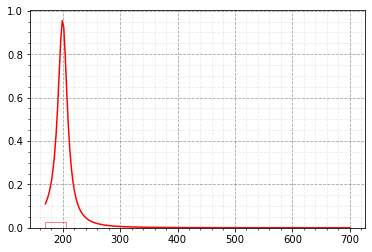

[200.  20.  30.] [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


In [31]:
def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)
data = ak.ravel(event_selection_masses)
bin_contents, bin_edges = np.histogram(data.to_numpy(), bins=20, range=(170, 650),density= True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[200, 20, 30],
                       sigma=np.sqrt(bin_contents))

plt.hist(data, bins=15, range=(170, 700), label='Data',zorder=0,density= True,histtype='step',color='r',alpha=0.5)
x2 = np.linspace(170, 700, 200)
y2 = relativistic_breit_wigner(x2, *popt)
plt.plot(x2, y2, label='Fit', color='r',zorder=1)
plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

plt.show()

print(popt,pcov)

In [32]:
m2 = popt[0]
m2_err = pcov[0,0]**0.5
print("mt =",m2,"±", m2_err)


mt = 200.0 ± inf


# Results

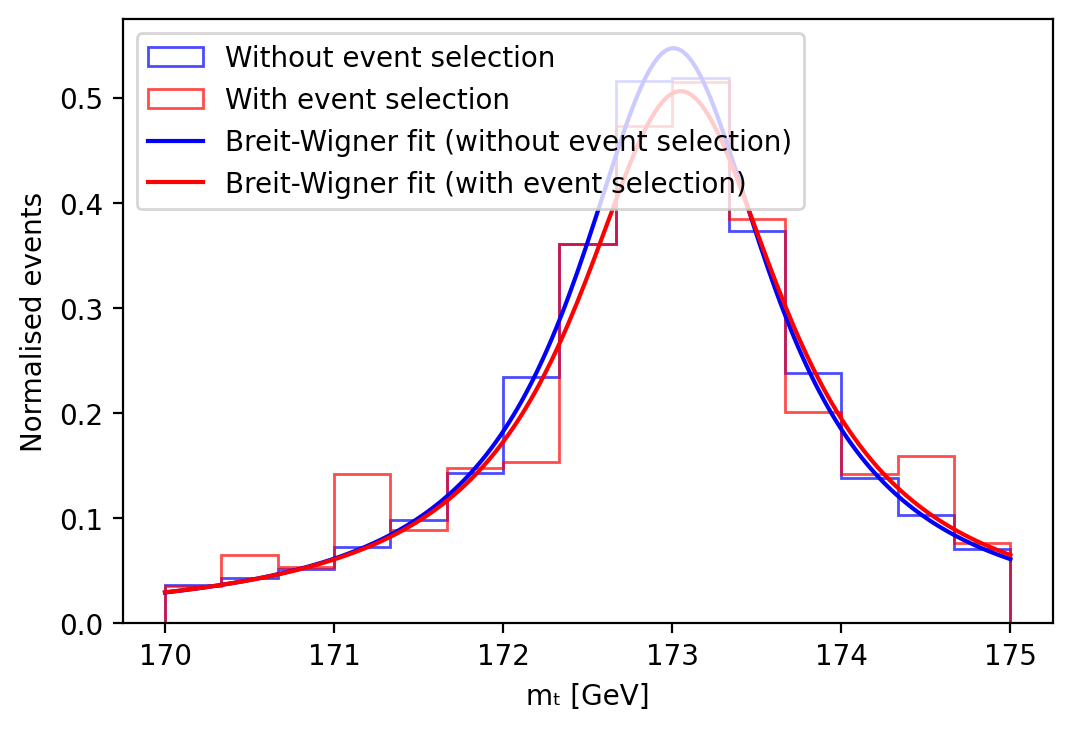

In [120]:
plt.hist(ak.ravel(no_event_selection_masses), histtype='step',bins=15, range=(170, 175),zorder=0,color = 'b', density= True, alpha = 0.7, label = 'Without event selection')
plt.hist(ak.ravel(event_selection_masses), bins=15, histtype='step', range=(170, 175),zorder=1,color = 'r',density= True, alpha = 0.7,label = 'With event selection')
plt.plot(x1, y1, label='Breit-Wigner fit (without event selection)', color='b',zorder=2)
plt.plot(x2, y2, label='Breit-Wigner fit (with event selection)', color='r',zorder=3)
plt.xlabel(u'm\u209c [GeV]')
plt.legend(loc='upper left')

plt.ylabel('Normalised events')
'''

plt.grid(visible=True, which='major', color='#666666', linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.text(400, 0.0027, 'Without event selection', fontsize = 8)
plt.text(400, 0.0025, '$m\u209c = 252.48  GeV$', fontsize = 8)
plt.text(400, 0.0023, '$\sigma m\u209c =  86.00 GeV$', fontsize = 8)

plt.text(570, 0.0027, 'With event selection', fontsize = 8)
plt.text(570, 0.0025, '$m\u209c = 281.24  GeV$', fontsize = 8)
plt.text(570, 0.0023, '$\sigma m\u209c =  103.10 GeV$', fontsize = 8)

plt.title('100 TeV',loc = 'right')
'''

plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

plt.show()


In [119]:
x = [m1,m2]
x_err = [m1_err,m2_err]
y = [10,12]

/var/folders/lv/682kgg495gggmtv7blrnjwp40000gn/T/ipykernel_15867/2523207117.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x,y,xerr = x_err,fmt='.k',ecolor= 'r',capsize = 5,capthick=2,color ='black')


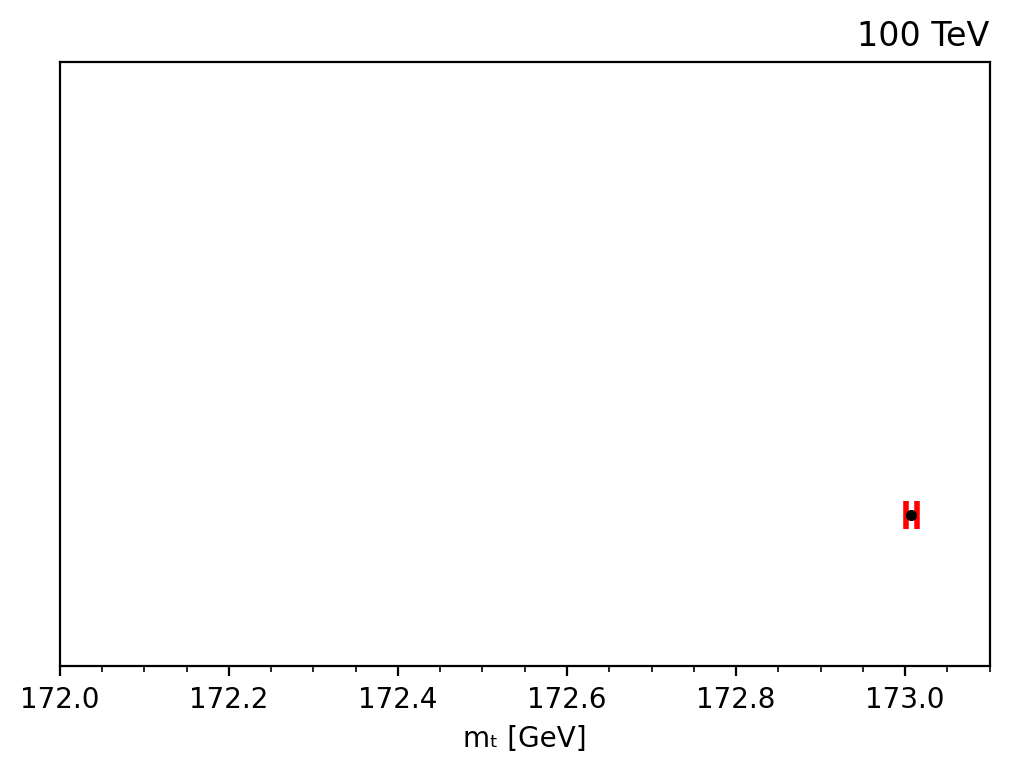

In [108]:

plt.errorbar(x,y,xerr = x_err,fmt='.k',ecolor= 'r',capsize = 5,capthick=2,color ='black')
plt.yticks([])

plt.xlabel('m\u209c [GeV]')
'''

plt.text(10, 12, 'Event selection', fontsize = 8)
plt.text(10, 10, 'No event selection', fontsize = 8)

plt.text(400, 12, '$m\u209c = 281.24 ± 103.10 GeV$', fontsize = 8)
plt.text(400, 10, '$m\u209c = 252.48 ± 86.00 GeV$', fontsize = 8)
'''

plt.xlim(172,173.1)
plt.ylim(9,13)
plt.title('100 TeV',loc='right')
plt.minorticks_on()


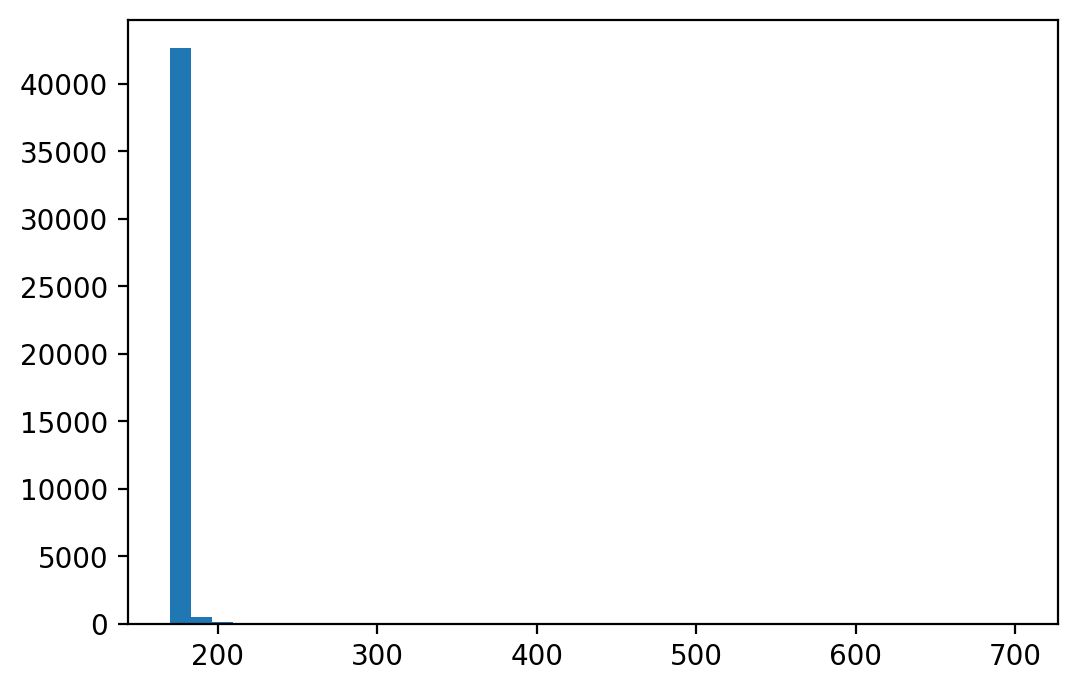

In [109]:
plt.hist(ak.ravel(no_event_selection_masses), bins=40, range=(170, 700))
plt.show()

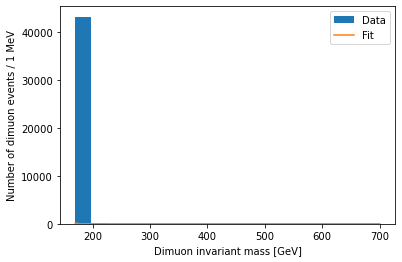

In [37]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(ak.ravel(no_event_selection_masses).to_numpy(), bins=200, range=(172, 174))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[180, 20, 30], sigma=np.sqrt(bin_contents))

plt.hist(ak.ravel(no_event_selection_masses), bins=20, range=(170, 700), label='Data')
x = np.linspace(170, 700, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()


In [58]:
popt[0]

200.0

In [6]:
events

NameError: name 'events' is not defined

AttributeError: 'function' object has no attribute 'tolist'